In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys

util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

import plot_tools

plt.rc('font', size=12)

### Bayesian data analysis
##  Chapter 6, demo 4

Posterior predictive checking for light speed example, p. 152-153.

In [42]:
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)

n = len(y)
s2 = np.var(y, ddof=1)
my = np.mean(y)

As we know the analytical form of the posterior predictive distribution we can use this to calculate test quantities.

Here we calculate, based on the form of the posterior predictive distribution, the tail area probability for each point in the observed data.

In this example this is:

$$p_i = \text{Pr}(T(y_i^{rep}) \leq T(y_i) \mid y)$$

with $T(y_i) = y_i$. 

In other words, under the posterior predictive distribution, what's the probability of finding a value more extreme than each of the original data points? If the observed data matches the posterior predictive we should expect to see a uniform distribution as we're plugging samples from the pdf into the cdf (uncomment the cell below to see this).

In [43]:
#y = stats.t.rvs(df=n-1, loc=my, scale=np.sqrt(s2*(1+1/n)), size=10000)

In [44]:
Ty = stats.t.cdf(y, n-1, loc=my, scale=np.sqrt(s2*(1+1/n)))

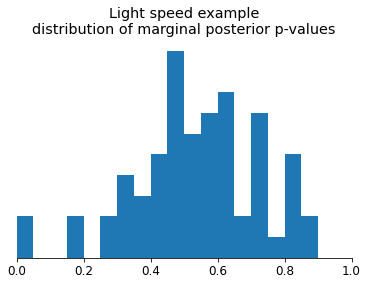

In [45]:
plt.hist(Ty, np.arange(0, 1.01, 0.05))
plt.xlim((0, 1))
plt.title('Light speed example\ndistribution of marginal posterior p-values')
plot_tools.modify_axes.only_x(plt.gca())